In [1]:
import pandas as pd
import re


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('varybufsel.csv', index_col="Task")
data1 =  pd.read_csv('varybufsel.csv', index_col="Task")

# Delete columns except 'Task' and those ending in 'Test Acc'
columns_to_keep = [col for col in data.columns if col.endswith('Test Acc') and "divnum300" not in col]
columns_to_keep1 = [col for col in data1.columns if col.endswith('Forget Acc') and "divnum300" not in col]

filtered_data = data[columns_to_keep]
filtered_data1 = data[columns_to_keep1]
# co = [col for col in filtered_data1.columns if "divnum600" in col and "pretrained0" in col]

# filtered_data1[co].to_csv("temp.csv")


In [3]:
import pandas as pd
import numpy as np
# Assuming you already have the filtered_data DataFrame

# Calculate the row-wise mean
row_mean = filtered_data.select_dtypes(include=[np.number]).mean(axis=0)

# Convert the row-wise mean into a Series
series_data = pd.Series(row_mean, index=filtered_data.columns)
series_data = series_data.rename(index=lambda x: x.replace("VaryReplaySeq-p", "VaryReplaySeq-divnum1-p"))
series_data = series_data.sort_index()
series_data = series_data*100

# Set the display options for pandas
pd.set_option('display.float_format', '{:.5f}'.format)
# Print the nicely formatted Series
print(len(series_data))


48


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

for column in filtered_data1.columns:
    first_value1 = filtered_data1[column].iloc[0]
    filtered_data1.loc[:, column] = (first_value1 - filtered_data1[column]) / first_value1
# Assuming you already have the filtered_data DataFrame

# Calculate the row-wise mean
row_mean1 = filtered_data1.iloc[1:21].select_dtypes(include=[np.number]).mean(axis=0)

# Convert the row-wise mean into a Series
series_data1 = pd.Series(row_mean1, index=filtered_data1.columns)
series_data1 = series_data1.rename(index=lambda x: x.replace("VaryReplaySeq-p", "VaryReplaySeq-divnum1-p"))
series_data1 = series_data1.sort_index()
series_data1 = series_data1*100


# Assuming you already have the series_data Series

# Convert the Series to a DataFrame
df1 = series_data1.to_frame(name='Test Acc')

# Extract the common prefix before the seed
prefixes1 = []
for index in df1.index:
    prefix = index.split('-seed')[0].strip()
    prefixes1.append(prefix)

# Add the prefixes as a new column in the DataFrame
df1['Prefix'] = prefixes1

# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
#     display(df)

# Extract unique prefixes
unique_prefixes1 = df1['Prefix'].unique()
print(unique_prefixes1)

# Calculate mean and standard deviation for each unique prefix
mean_values1 = []
std_values1 = []
for prefix in unique_prefixes1:
    values1 = df1.loc[df1['Prefix'] == prefix, 'Test Acc']
    mean_values1.append(values1.mean())
    std_values1.append(values1.std())
    



['VaryBufferSel-divnum1-pretrained0-styleeasiest'
 'VaryBufferSel-divnum1-pretrained0-stylehardest'
 'VaryBufferSel-divnum1-pretrained0-styleuniform'
 'VaryBufferSel-divnum1-pretrained1-styleeasiest'
 'VaryBufferSel-divnum1-pretrained1-stylehardest'
 'VaryBufferSel-divnum1-pretrained1-styleuniform'
 'VaryBufferSel-divnum600-pretrained0-styleeasiest'
 'VaryBufferSel-divnum600-pretrained0-stylehardest'
 'VaryBufferSel-divnum600-pretrained0-styleuniform'
 'VaryBufferSel-divnum600-pretrained1-styleeasiest'
 'VaryBufferSel-divnum600-pretrained1-stylehardest'
 'VaryBufferSel-divnum600-pretrained1-styleuniform']


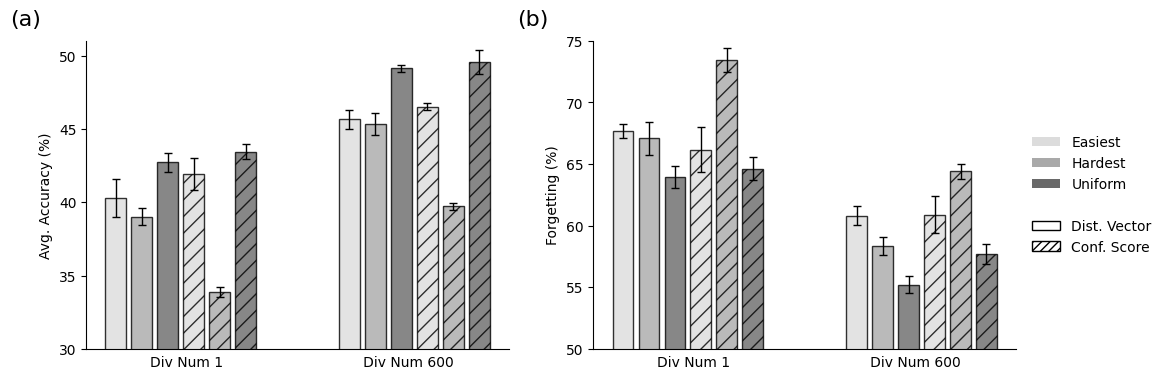

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 4), subplot_kw={'sharey': True})

# Convert the Series to a DataFrame
df = series_data.to_frame(name='Test Acc')

# Extract the common prefix before the seed
prefixes = []
for index in df.index:
    prefix = index.split('-seed')[0].strip()
    prefixes.append(prefix)

# Add the prefixes as a new column in the DataFrame
df['Prefix'] = prefixes

# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
#     display(df)

# Extract unique prefixes
unique_prefixes = df['Prefix'].unique()

# Calculate mean and standard deviation for each unique prefix
mean_values = []
std_values = []
for prefix in unique_prefixes1:
    values = df.loc[df['Prefix'] == prefix, 'Test Acc']
    mean_values.append(values.mean())
    std_values.append(values.std())

# Add bars for divnum 1 prefixes
turning1 = 1
for i, prefix in enumerate(unique_prefixes1):
    if "divnum600" in prefix and turning1:
        turning1 = 0
        ax.bar(" ", 0, color='white', linewidth=0)
        ax.bar("  ", 0, color='white', linewidth=0)
        ax.bar("   ", 0, color='white', linewidth=0)

    if 'styleeasiest' in prefix:
        color = 'gainsboro'
    elif 'styleuniform' in prefix:
        color = 'dimgrey'
    else:
        color = 'darkgray'
        
    error_kw = {'elinewidth': 1, 'capsize': 3, 'capthick': 1}
    bar = ax.bar(prefix, mean_values[i], yerr=std_values[i], alpha=0.8, color=color, edgecolor='black', linewidth=1, error_kw=error_kw)
    if 'pretrained1' in prefix:
        for rect in bar:
            rect.set_hatch('//')

# Set plot labels and title
ax.set_ylabel('Avg. Accuracy (%)')
ax.set_xlabel('Div Num 1                                Div Num 600')
ax.xaxis.set_label_coords(0.51, -0.02) 
# plt.title('Avg. Accuracy (%) Across Different Replay Sequences')

ax.set_xticks([])
ax.set_yticks(list(range(30, 51, 5)))
ax.set_ylim(30, 51)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# Add bars for divnum 1 prefixes
turning1 = 1
for i, prefix in enumerate(unique_prefixes1):
    if "divnum600" in prefix and turning1:
        turning1 = 0
        ax1.bar(" ", 0, color='white', linewidth=0)
        ax1.bar("  ", 0, color='white', linewidth=0)
        ax1.bar("   ", 0, color='white', linewidth=0)

    if 'styleeasiest' in prefix:
        color = 'gainsboro'
    elif 'styleuniform' in prefix:
        color = 'dimgray'
    else:
        color = 'darkgrey'
        
    error_kw = {'elinewidth': 1, 'capsize': 3, 'capthick': 1}
    bar = ax1.bar(prefix, mean_values1[i], yerr=std_values1[i], alpha=0.8, color=color, edgecolor='black', linewidth=1, error_kw=error_kw)
    if 'pretrained1' in prefix:
        for rect in bar:
            rect.set_hatch('//')

# Set plot labels and title
ax1.set_ylabel('Forgetting (%)')
ax1.set_xlabel('Div Num 1                                Div Num 600')
ax1.xaxis.set_label_coords(0.51, -0.02) 
# plt.title('Avg. Accuracy (%) Across Different Replay Sequences')

ax1.set_xticks([])
ax1.set_ylim(50, 75)
ax1.set_yticks(list(range(50, 76, 5)))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)



# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc='gainsboro'),
    plt.Rectangle((0, 0), 1, 1, fc='darkgrey'),
    plt.Rectangle((0, 0), 1, 1, fc='dimgray'),
    plt.Rectangle((0, 0), 1, 1, fc='white'),
    plt.Rectangle((0, 0), 1, 1, fc='white', hatch='', ec='black', lw=1),
    plt.Rectangle((0, 0), 1, 1, fc='white', hatch='////', ec='black', lw=1),
]
legend_labels = ['Easiest', 'Hardest', "Uniform", "", 'Dist. Vector', 'Conf. Score']
ax1.legend(legend_elements, legend_labels, loc="center right",  bbox_to_anchor=(1.35, 0.5), ncol=1, frameon=False)


ax.text(-0.18, 1.05, '(a)', transform=ax.transAxes, fontsize=16)
ax1.text(-0.18, 1.05, '(b)', transform=ax1.transAxes, fontsize=16)

plt.savefig("varybufsel100.pdf", bbox_inches='tight')

# remove bounding box of legend, move to top and make horizontal top or move it to general for both figure
# swap and standardise
# baseline no need 

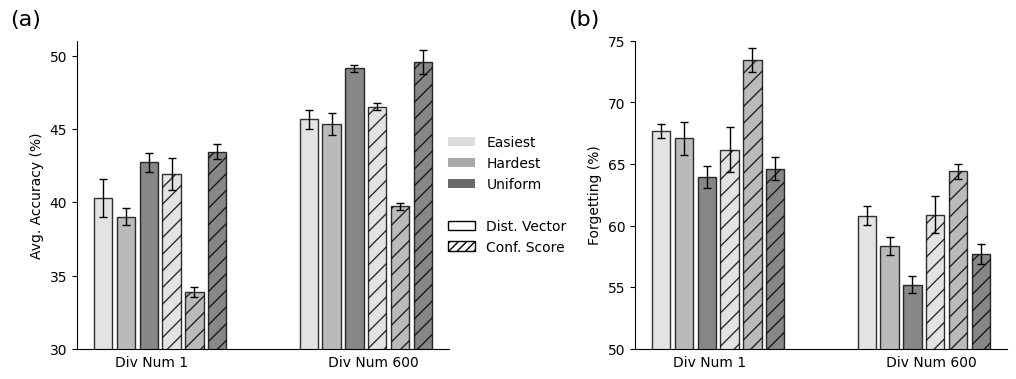

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 4), subplot_kw={'sharey': True})
plt.subplots_adjust(wspace=0.5)

# Convert the Series to a DataFrame
df = series_data.to_frame(name='Test Acc')

# Extract the common prefix before the seed
prefixes = []
for index in df.index:
    prefix = index.split('-seed')[0].strip()
    prefixes.append(prefix)

# Add the prefixes as a new column in the DataFrame
df['Prefix'] = prefixes

# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
#     display(df)

# Extract unique prefixes
unique_prefixes = df['Prefix'].unique()

# Calculate mean and standard deviation for each unique prefix
mean_values = []
std_values = []
for prefix in unique_prefixes1:
    values = df.loc[df['Prefix'] == prefix, 'Test Acc']
    mean_values.append(values.mean())
    std_values.append(values.std())

# Add bars for divnum 1 prefixes
turning1 = 1
for i, prefix in enumerate(unique_prefixes1):
    if "divnum600" in prefix and turning1:
        turning1 = 0
        ax.bar(" ", 0, color='white', linewidth=0)
        ax.bar("  ", 0, color='white', linewidth=0)
        ax.bar("   ", 0, color='white', linewidth=0)

    if 'styleeasiest' in prefix:
        color = 'gainsboro'
    elif 'styleuniform' in prefix:
        color = 'dimgrey'
    else:
        color = 'darkgray'
        
    error_kw = {'elinewidth': 1, 'capsize': 3, 'capthick': 1}
    bar = ax.bar(prefix, mean_values[i], yerr=std_values[i], alpha=0.8, color=color, edgecolor='black', linewidth=1, error_kw=error_kw)
    if 'pretrained1' in prefix:
        for rect in bar:
            rect.set_hatch('//')

# Set plot labels and title
ax.set_ylabel('Avg. Accuracy (%)')
ax.set_xlabel('Div Num 1                                Div Num 600')
ax.xaxis.set_label_coords(0.51, -0.02) 
# plt.title('Avg. Accuracy (%) Across Different Replay Sequences')

ax.set_xticks([])
ax.set_yticks(list(range(30, 51, 5)))
ax.set_ylim(30, 51)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# Add bars for divnum 1 prefixes
turning1 = 1
for i, prefix in enumerate(unique_prefixes1):
    if "divnum600" in prefix and turning1:
        turning1 = 0
        ax1.bar(" ", 0, color='white', linewidth=0)
        ax1.bar("  ", 0, color='white', linewidth=0)
        ax1.bar("   ", 0, color='white', linewidth=0)

    if 'styleeasiest' in prefix:
        color = 'gainsboro'
    elif 'styleuniform' in prefix:
        color = 'dimgray'
    else:
        color = 'darkgrey'
        
    error_kw = {'elinewidth': 1, 'capsize': 3, 'capthick': 1}
    bar = ax1.bar(prefix, mean_values1[i], yerr=std_values1[i], alpha=0.8, color=color, edgecolor='black', linewidth=1, error_kw=error_kw)
    if 'pretrained1' in prefix:
        for rect in bar:
            rect.set_hatch('//')

# Set plot labels and title
ax1.set_ylabel('Forgetting (%)')
ax1.set_xlabel('Div Num 1                                Div Num 600')
ax1.xaxis.set_label_coords(0.51, -0.02) 
# plt.title('Avg. Accuracy (%) Across Different Replay Sequences')

ax1.set_xticks([])
ax1.set_ylim(50, 75)
ax1.set_yticks(list(range(50, 76, 5)))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)



# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc='gainsboro'),
    plt.Rectangle((0, 0), 1, 1, fc='darkgrey'),
    plt.Rectangle((0, 0), 1, 1, fc='dimgray'),
    plt.Rectangle((0, 0), 1, 1, fc='white'),
    plt.Rectangle((0, 0), 1, 1, fc='white', hatch='', ec='black', lw=1),
    plt.Rectangle((0, 0), 1, 1, fc='white', hatch='////', ec='black', lw=1),
]
legend_labels = ['Easiest', 'Hardest', "Uniform", "", 'Dist. Vector', 'Conf. Score']
ax1.legend(legend_elements, legend_labels, loc="center right",  bbox_to_anchor=(-0.15, 0.5), ncol=1, frameon=False)


ax.text(-0.18, 1.05, '(a)', transform=ax.transAxes, fontsize=16)
ax1.text(-0.18, 1.05, '(b)', transform=ax1.transAxes, fontsize=16)

plt.savefig("varybufsel100.pdf")

# remove bounding box of legend, move to top and make horizontal top or move it to general for both figure
# swap and standardise
# baseline no need 

clusterdistanceeasiest
gainsboro
clusterdistancehardest
darkgrey
clusterdistanceuniform
dimgray
pretrainedcifareasiest
gainsboro
pretrainedcifarhardest
darkgrey
pretrainedcifaruniform
dimgray


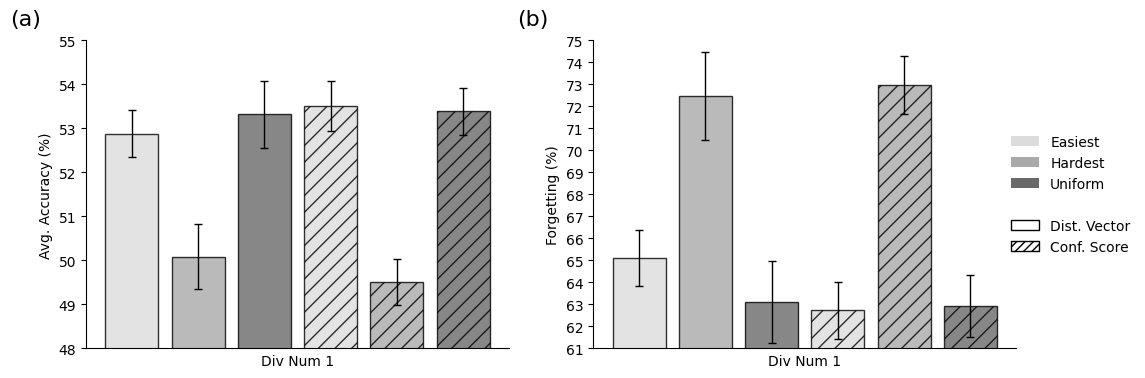

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 4), subplot_kw={'sharey': True})

a = {'clusterdistanceeasiest': (65.09850511534665, 1.2632693415188996), 
     'clusterdistancehardest': (72.48829540548584, 1.998866404340141), 
     'clusterdistanceuniform': (63.09944907294961, 1.8740248172011964), 
     'pretrainedcifareasiest': (62.73199425975946, 1.300390148989272), 
     'pretrainedcifarhardest': (72.99186257825777, 1.3181805772653346), 
     'pretrainedcifaruniform': (62.9362008384185, 1.3942834158490758)}


ll = {'clusterdistanceeasiest': (52.88189166666667, 0.5351213975920036), 
      'clusterdistancehardest': (50.08056666666666, 0.7392067967112409), 
      'clusterdistanceuniform': (53.32235, 0.7656095799736112), 
      'pretrainedcifareasiest': (53.51105, 0.5712675991888916), 
      'pretrainedcifarhardest': (49.5079, 0.5299986163503947), 
      'pretrainedcifaruniform': (53.39091666666667, 0.5328340192829875)}

turning1 = 1
for prefix, v in ll.items():
    print(prefix)
    if 'easiest' in prefix:
        color = 'gainsboro'
    elif 'uniform' in prefix:
        color = 'dimgray'
    else:
        color = 'darkgrey'
    print(color)
    error_kw = {'elinewidth': 1, 'capsize': 3, 'capthick': 1}
    bar = ax.bar(prefix, v[0], yerr=v[1], alpha=0.8, color=color, edgecolor="black", linewidth=1, error_kw=error_kw)
    if 'pretrained' in prefix:
        for rect in bar:
            rect.set_hatch('//')

# Set plot labels and title
ax.set_ylabel('Avg. Accuracy (%)')
ax.set_xlabel('Div Num 1')

ax.set_xticks([])
ax.set_ylim(48, 55)
ax.set_yticks(list(range(48, 56)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


    
turning1 = 1
for prefix, v in a.items():  
    if 'easiest' in prefix:
        color = 'gainsboro'
    elif 'uniform' in prefix:
        color = 'dimgray'
    else:
        color = 'darkgrey'
    error_kw = {'elinewidth': 1, 'capsize': 3, 'capthick': 1}
    bar = ax1.bar(prefix, v[0], yerr=v[1], alpha=0.8, color=color, edgecolor="black", linewidth=1, error_kw=error_kw)
    if 'pretrained' in prefix:
        for rect in bar:
            rect.set_hatch('//')

ax1.set_ylabel('Forgetting (%)')
ax1.set_xlabel('Div Num 1')

ax1.set_xticks([])
ax1.set_ylim(61, 75)
ax1.set_yticks(list(range(61, 76)))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)



# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc='gainsboro'),
    plt.Rectangle((0, 0), 1, 1, fc='darkgrey'),
    plt.Rectangle((0, 0), 1, 1, fc='dimgray'),
    plt.Rectangle((0, 0), 1, 1, fc='white'),
    plt.Rectangle((0, 0), 1, 1, fc='white', hatch='', ec='black', lw=1),
    plt.Rectangle((0, 0), 1, 1, fc='white', hatch='////', ec='black', lw=1),
]
legend_labels = ['Easiest', 'Hardest', "Uniform", "", 'Dist. Vector', 'Conf. Score']
ax1.legend(legend_elements, legend_labels, loc="center right",  bbox_to_anchor=(1.3, 0.5), ncol=1, frameon=False)


ax.text(-0.18, 1.05, '(a)', transform=ax.transAxes, fontsize=16)
ax1.text(-0.18, 1.05, '(b)', transform=ax1.transAxes, fontsize=16)

plt.savefig("varybufsel10.pdf")